## Challenge 13
Name: Adam Levin  
Topic: Word Clustering

In [1]:
from pymongo import MongoClient

In [2]:
client = MongoClient()

In [3]:
db = client.dogparty

In [4]:
dog_party = db.dog_party

In [6]:
dog_party.find_one()

{u'_id': ObjectId('57b0e47785db9e02fd66222a'),
 u'favorite_count': 2,
 u'retweet_count': 0,
 u'screen_name': u'twigs_ebooks',
 u'text': u"I'm at a house party bitches. Im plsying beer pong the dog stole the ball lol."}

**Challenge 1**

When querying tweets with the API, I specified no retweets.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

In [8]:
text = dog_party.find({},{'text':1,'_id':0})
text = [t['text'] for t in text]

In [9]:
text[0:2]

[u"I'm at a house party bitches. Im plsying beer pong the dog stole the ball lol.",
 u'https://t.co/TsQfw2im2I #4862 12x Female Pet Dog Dress Christmas Party Wear Moustache Fancy Costume Apparel M https://t.co/v5vKBWz7rg']

In [10]:
def cleanse_tweets(tweets):
    return [' '.join([word for word in tweet.split() if 'http://' not in word and 'www.' not in word
            and '@' not in word and 'https://' not in word and '.com' not in word and '.net' not in word])
            for tweet in tweets]

In [11]:
text = cleanse_tweets(text)

In [12]:
text[0:2]

[u"I'm at a house party bitches. Im plsying beer pong the dog stole the ball lol.",
 u'#4862 12x Female Pet Dog Dress Christmas Party Wear Moustache Fancy Costume Apparel M']

In [13]:
tfidf = TfidfVectorizer(lowercase=True, analyzer='word', stop_words='english', 
                        ngram_range=(1, 2), min_df=3,binary=False, use_idf=True)

In [14]:
X_text = tfidf.fit_transform(text)

In [15]:
X_text.shape

(100, 64)

In [16]:
tfidf.get_feature_names() [0:5]

[u'aisle', u'aisle review', u'amp', u'apparel', u'apparel puppy']

In [17]:
kmeans = KMeans(n_clusters = 5, n_init=100)

In [18]:
kmeans.fit_transform(X_text);

In [19]:
np.array(text)[kmeans.labels_==0]

array([ u"I'm at a house party bitches. Im plsying beer pong the dog stole the ball lol.",
       u'The best thing that can happen at a party is getting to meet a new dog',
       u'Mom Comes Home And Confronts Her Dog About The Giant Mess. He Points and Rats Out The Guilty Party.',
       u'At a party for a dog with a bunch of old people. Where is my mind?',
       u"I'm out at a house party and I'm literally no lying spooning the massive dog in the middle of the living room #lifegoals #lovedogs",
       u'I blame the GOP for this! They did not put a muzzle nor a leash on their rabid dog &amp; racist party!',
       u'yeah, power move to add a free street dog stand after the party ends. Best touch to a party',
       u"It's time for this party to head to my bedroom *grabs series and dog*",
       u'og_short_dog and garciafea wearing Love. Peeps. Party. Shirts made by as bridal',
       u"me when I'm at a party and the owner of the home doesn't have a dog I can be antisocial with",
   

In [20]:
np.array(text)[kmeans.labels_==1]

array([u'Why is it called sausage party when it is about a hot dog???',
       u'eating a hot dog while watching sausage party',
       u'Now every time I see a hot dog and bun I think about the movie sausage party',
       u'Clever, funny, yet disturbing. I will never look at a hot dog in a bun the same way again!',
       u'Metaphysical questions in the hot dog aisle. Our review of "Sausage Party."',
       u'nytimesarts: Metaphysical questions in the hot dog aisle. Our review of "Sausage Party."',
       u'Metaphysical questions in the hot dog aisle. Our review of "Sausage Party."',
       u'if you wanna see a hot dog bun and a taco fuck each other in the middle of a grocery store...sausage party is the movie for you',
       u'whos your sausage party kin? im the tiny hot dog!! &gt;w&lt;',
       u"Just saw Sausage Party! So inappropriate and so funny. Actually very poignant at times. Now I'm eating a hot dog and chips. Yummy! Nom. Nom",
       u"bieber's dick looks like the deforme

That's the dog-birthday people

In [21]:
np.array(text)[kmeans.labels_==2]

array([u'found a dog at a party and b&amp;w theme is hard',
       u'PSA: there is a dog party in Freelander Park today.',
       u'I am currently on my way to a dog party and I have never been so excited for something before',
       u'Always that guy finding the dog at the party',
       u"this dog party was important to me and it started at 4:30 but where's my mom ??? she's still not fucking home",
       u'When theres a dog at the party pt 2',
       u'This not fair dog. Whatever. If party dont care I dont care',
       u'When theres a dog at the party #gang',
       u'Yes sir, Stiegl Radler and a hip-hop hot-dog party Happy birthday',
       u'Why am I always the friend that finds the dog at the party',
       u"I'm at a dog party.",
       u'GUYS I WENT TO A DOG PARTY!!!!!! OMFG IT WAS SO CUTE',
       u"That's why you don't bring a dog to a party , slowbrain .... Lol",
       u'When I see a dog at a party'], 
      dtype='<U140')

Referring to hot dogs/sausages

In [22]:
np.array(text)[kmeans.labels_==3]

array([u'My dog is my life ofc hes gonna have a party for hes first birthday',
       u'My dog birthday party is gonna be so .. You coming over ?',
       u"Someone please tell me why we're having a birthday party for Lexi's dog",
       u'Mom: Marley is so sad you missed her birthday party yesterday Stepdad: (Marley is our dog)',
       u"Downward facing dog - Lola tired out at Beth's birthday party #dachshund",
       u"my sister just said that she's having a dog birthday party and that everyone has to bring their dogs",
       u'Dog Birthday Party...so doing this for Hank this year!',
       u'FLYING SOAP Shower!! RC Truck VS Dog, Birthday Party at Dales, Crazy FIR... via',
       u'FLYING SOAP Shower!! RC Truck VS Dog, Birthday Party at Dales, Crazy FIR...',
       u"we're having a birthday party for my dog its about to be a blast !!"], 
      dtype='<U140')

not sure how that one differs from the first one.

In [23]:
np.array(text)[kmeans.labels_==4]

array([ u'#4862 12x Female Pet Dog Dress Christmas Party Wear Moustache Fancy Costume Apparel M',
       u'#7172 SHABBY PINK LACE SIZE XSMALL DOG HARNESS DRESS PET WEDDING PARTY Bridesmaid',
       u'#1818 DOG DRESS IVORY POSH CHIFFON Medium Pet PIG PARTY WEDDING BRIDESMAID',
       u'#1595 Small-Jeweled Pink Sparkle Party Dress -Dog dress Clothes Pet apparel puppy',
       u'#6795 Small-Jeweled Pink Sparkle Party Dress -Dog dress Clothes Pet apparel puppy',
       u'#5897 Pet Dog Clothes Fancy Pumpkin Costume Pup Halloween Apparel Party Coat Jacket',
       u'#2376 Small-Jeweled Pink Sparkle Party Dress -Dog dress Clothes Pet apparel puppy',
       u'#1827 Small-Jeweled Pink Sparkle Party Dress -Dog dress Clothes Pet apparel puppy',
       u'#8190 Small-Jeweled Pink Sparkle Party Dress -Dog dress Clothes Pet apparel puppy'], 
      dtype='<U140')

Those numbers are probably throwing everything off. I will remove them. Then I will remove duplicate tweets because this throws off KMeans.

In [27]:
text = [' '.join([word for word in tweet.split() if not word.startswith('#')]) for tweet in text]

In [28]:
text = list(set(text))

In [29]:
len(text)

95

In [30]:
X_text = tfidf.fit_transform(text)

In [31]:
X_text.shape

(95, 40)

**Challenge 2**

In [32]:
inertias = []
for k in range(2,20):
    kmeans = KMeans(n_clusters = k, n_init=100)
    kmeans.fit(X_text)
    inertias.append(kmeans.inertia_)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

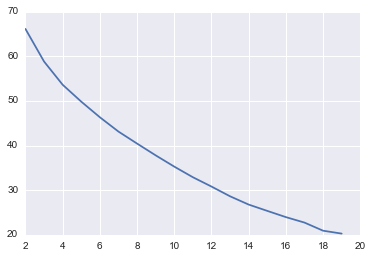

In [34]:
plt.plot(range(2,20),inertias);

Wow, that is a gross looking interia curve.

**Challenge 3**

I'm going to use k=10 for no reason whatsoever.

In [35]:
kmeans = KMeans(n_clusters = 10, n_init=100)
kmeans.fit(X_text);

In [36]:
from collections import Counter
from sklearn.metrics import pairwise_distances

In [37]:
label_counter = Counter(kmeans.labels_)

In [38]:
for label in sorted(label_counter,key=label_counter.get,reverse=True)[:3]:
    print '%d feel like this: ' % label_counter[label]
    closest_ind = np.argmin(pairwise_distances(X_text,kmeans.cluster_centers_[label].reshape(1,-1)))
    print text[closest_ind],'\n'

22 feel like this: 
Breaking: 3 men and a dog in hostile take over national political party 

18 feel like this: 
i cant wait til ppl start making porn of the hot dog buns with titties from sausage party 

15 feel like this: 
When theres a dog at the party pt 2 



**Challenge 4**

In [39]:
tfidf = TfidfVectorizer(lowercase=True, analyzer='word', stop_words='english', 
                        ngram_range=(1, 1), min_df=1,binary=False, use_idf=True)

In [40]:
docs = ['' for _ in range(10)]
for cluster in range(10):
    docs[cluster] += ' '.join(np.array(text)[kmeans.labels_==cluster])
X_docs = tfidf.fit_transform(docs).toarray()

In [41]:
for cluster in range(10):
    print 'Cluster %d has %d tweets.' % (cluster,sum(kmeans.labels_==cluster))
    print 'Here are the top 5 keywords: ',', '.join(np.array(tfidf.get_feature_names())[np.argsort(X_docs[cluster,:])[::-1][:5]])
    print

Cluster 0 has 3 tweets.
Here are the top 5 keywords:  come, swim, dog, party, bought

Cluster 1 has 18 tweets.
Here are the top 5 keywords:  sausage, hot, dog, party, bun

Cluster 2 has 22 tweets.
Here are the top 5 keywords:  party, dog, power, house, living

Cluster 3 has 15 tweets.
Here are the top 5 keywords:  party, dog, like, care, today

Cluster 4 has 11 tweets.
Here are the top 5 keywords:  birthday, dog, party, having, truck

Cluster 5 has 5 tweets.
Here are the top 5 keywords:  amp, gop, hops, dog, party

Cluster 6 has 5 tweets.
Here are the top 5 keywords:  dog, party, lit, downstairs, deadass

Cluster 7 has 7 tweets.
Here are the top 5 keywords:  night, party, dog, want, time

Cluster 8 has 4 tweets.
Here are the top 5 keywords:  home, mom, party, dog, owner

Cluster 9 has 5 tweets.
Here are the top 5 keywords:  pet, dress, apparel, costume, clothes



**Challenge 5**

In [42]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

def noun_filter(doc):
    words = word_tokenize(doc)
    tags = pos_tag(words)
    return ' '.join([tup[0] for tup in tags if tup[1]=='NN'])

In [43]:
docs = [noun_filter(doc) for doc in docs]

In [44]:
X_docs = tfidf.fit_transform(docs).toarray()

In [45]:
for cluster in range(10):
    print 'Cluster %d has %d tweets.' % (cluster,sum(kmeans.labels_==cluster))
    print 'Here are the top 5 key nouns: ',', '.join(np.array(tfidf.get_feature_names())[np.argsort(X_docs[cluster,:])[::-1][:5]])
    print

Cluster 0 has 3 tweets.
Here are the top 5 key nouns:  dad, day, sing, play, swim

Cluster 1 has 18 tweets.
Here are the top 5 key nouns:  sausage, dog, bun, party, movie

Cluster 2 has 22 tweets.
Here are the top 5 key nouns:  dog, party, power, living, house

Cluster 3 has 15 tweets.
Here are the top 5 key nouns:  party, dog, today, care, balloon

Cluster 4 has 11 tweets.
Here are the top 5 key nouns:  birthday, dog, party, blast, year

Cluster 5 has 5 tweets.
Here are the top 5 key nouns:  amp, party, dog, leash, theme

Cluster 6 has 5 tweets.
Here are the top 5 key nouns:  dog, party, office, bunch, mind

Cluster 7 has 7 tweets.
Here are the top 5 key nouns:  night, party, dog, time, cheese

Cluster 8 has 4 tweets.
Here are the top 5 key nouns:  home, dog, party, man, wine

Cluster 9 has 5 tweets.
Here are the top 5 key nouns:  dress, yummy, friend, day, democrat



**Challenge 6**

I'm skipping this one since my sample size is already so small that k-means is quick as is.

**Challenge 7**

In [46]:
inertias = [[] for _ in [1,2,3,10]]
for k in range(2,14):
    for u,n_init in enumerate([1,2,3,10]):
        kmeans = KMeans(n_clusters=k, init='random', n_init=n_init)
        kmeans.fit(X_text)
        inertias[u].append(kmeans.inertia_)

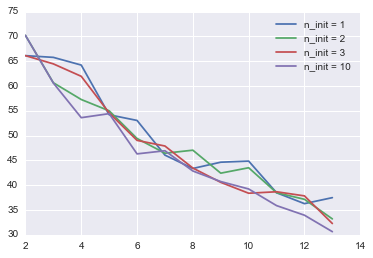

In [47]:
for u,n_init in enumerate([1,2,3,10]):
    plt.plot(range(2,14),inertias[u],label='n_init = %d' % n_init)
plt.legend();

Seems like the intertia is smaller for higher n_init.

**Challenge 8**

In [48]:
!curl 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv' > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15021  100 15021    0     0  11955      0  0:00:01  0:00:01 --:--:-- 26727


In [73]:
import pandas as pd
from sklearn.preprocessing import scale

In [98]:
data = pd.read_csv('data.csv')

In [99]:
data.head()
data_names = data.columns

In [103]:
data = scale(data)

In [104]:
kmeans = KMeans(n_clusters=6, n_init=15)
kmeans.fit(data[:,2:]);

In [105]:
for cluster in range(6):
    print cluster, sum(kmeans.labels_==cluster)

0 96
1 277
2 1
3 54
4 2
5 10


That seems like a weird clustering distribution. Let's look at an inertia curve.

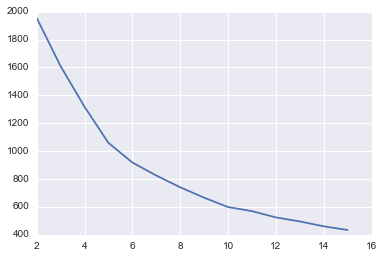

In [106]:
inertias = []
for k in range(2,16):
    kmeans = KMeans(n_clusters=k, n_init=15)
    kmeans.fit(data[:,2:]);
    inertias.append(kmeans.inertia_)
plt.plot(range(2,16),inertias);

There seems to be an elbow around 5 so I'll choose 5.

In [107]:
kmeans = KMeans(n_clusters=5, n_init=55)
kmeans.fit(data[:,2:]);

In [108]:
for cluster in range(5):
    print cluster, sum(kmeans.labels_==cluster)

0 63
1 269
2 1
3 10
4 97


There seems to be one customer who is unlike everyone else.

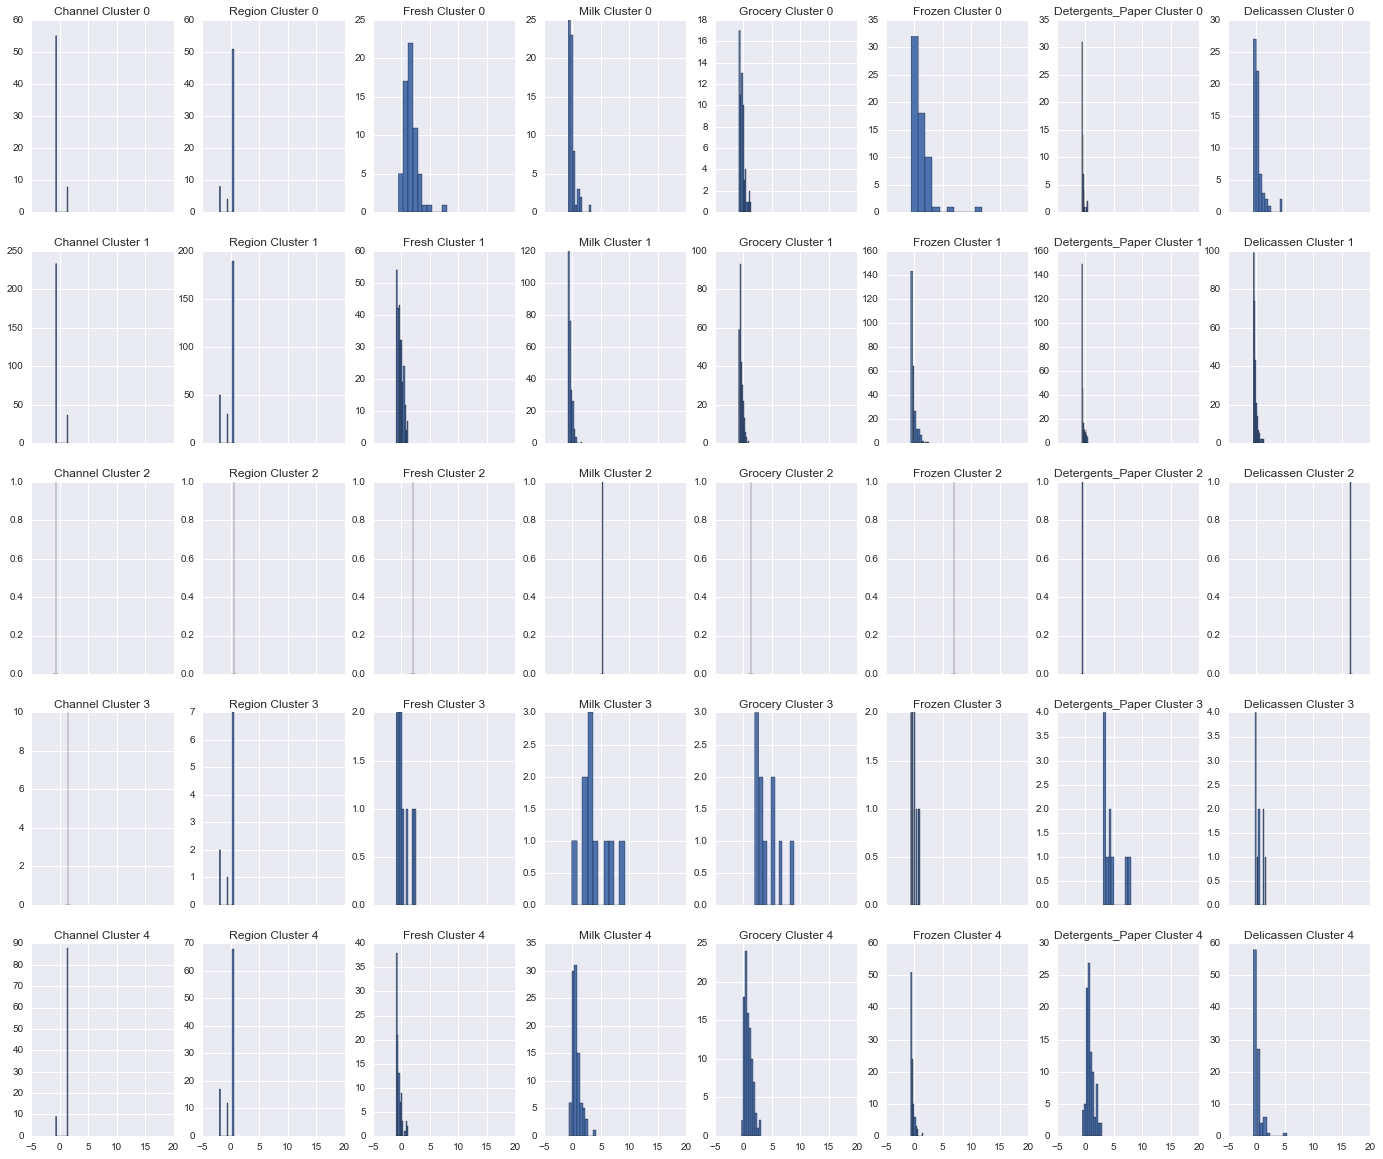

In [116]:
f, axarr = plt.subplots(5, 8, figsize=(24, 20),sharex=True)
for cluster in range(5):
    for col in range(8):
        axarr[cluster,col].hist(data[kmeans.labels_==cluster,col])
        axarr[cluster,col].set_title(data_names[col]+' Cluster %d' % cluster)

Cluster 0: The Fresh and Frozen Crowd  
Cluster 1: Hardly buys anything  
Cluster 2: The Deli Fiend  
Cluster 3: The Milk Buyers  
Cluster 4: The Grocery People